# Metaflow

### Hyper-parameter Search using Metaflow branchs MovieStatsFlow. 

## Import the metaflow client

In [84]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/rkazinnik/Library/Preferences/PyCharm2019.1/metaflow/metaflow-tutorials


## Get statistics from the latest run of flow RK002StatsFlow

In [85]:
run0 = Flow('RK004StatsFlow').latest_successful_run
print("Using run: %s" % str(run0))

model_stats = run0.data.model_stats

Using run: Run('RK004StatsFlow/1583434245199778')


In [86]:
print(run0.data)
print(run0.data.nhyper, run0.data.nbackward, run0.data.name,  run0.data.nfeatures)

<MetaflowData: epochs, model_stats, nhyper, nbackward, name, nfeatures>
4 10 RK004StatsFlow 20


In [99]:
for run in Flow('RK004StatsFlow').runs():
    if run.successful:
        print("\n === ", run, " generated on %s" % run.finished_at)
        #print("Playlist for movies in genre '%s'" % run.data.genre)
        print(run.data)
        print("flow name '%s'" % run.data.name)
        print("nhyper =",run.data.nhyper, "nt =", run.data.nbackward, "nfeatures =",run.data.nfeatures)
        
        keys = list(run.data.model_stats.keys())
        print("branches hyper-parameter experiments LSTM", keys)
        branch0 = run.data.model_stats[keys[0]]
        bkeys = list(branch0)
        # print("\n branch-1 output: ", bkeys)
        print("branch-1: train_auc, test_auc:", branch0['train_auc'],  branch0['test_auc'])
        #if run.data.playlist:
        #    print("Top Pick: '%s'" % run.data.playlist[0])
        print('\n')
    else:
        print("\n\n === ", run, "not successful")



 ===  Run('RK004StatsFlow/1583434856117425') not successful

 ===  Run('RK004StatsFlow/1583434643734250')  generated on 2020-03-05T19:00:33.fZ
<MetaflowData: epochs, model_stats, nhyper, nbackward, name, nfeatures>
flow name 'RK004StatsFlow'
nhyper = 4 nt = 10 nfeatures = 10
branches hyper-parameter experiments LSTM [5, 10, 15, 20]
branch-1: train_auc, test_auc: 0.5819719 0.46827567



 ===  Run('RK004StatsFlow/1583434245199778')  generated on 2020-03-05T18:53:27.fZ
<MetaflowData: epochs, model_stats, nhyper, nbackward, name, nfeatures>
flow name 'RK004StatsFlow'
nhyper = 4 nt = 10 nfeatures = 20
branches hyper-parameter experiments LSTM [5, 10, 15, 20]
branch-1: train_auc, test_auc: 0.68646324 0.5769581



 ===  Run('RK004StatsFlow/1583432817294666')  generated on 2020-03-05T18:33:09.fZ
<MetaflowData: model_stats, nhyper, nbackward, name, nfeatures>
flow name 'RK004StatsFlow'
nhyper = 10 nt = 10 nfeatures = 20
branches hyper-parameter experiments LSTM [5, 10, 15, 20, 25, 30, 35, 40,

In [112]:
import copy 
reverse_runs = copy.copy(list(Flow('RK004StatsFlow')))
reverse_runs.reverse()                         
#run = reverse(list(Flow('RK004StatsFlow').runs()))[3]
run = reverse_runs[4]
                         
#run = Flow('RK004StatsFlow').latest_successful_run
print("run: %s" % str(run))
print("branch keys: ", list(run.data.model_stats))
assert run.successful

run: Run('RK004StatsFlow/1583432817294666')
branch keys:  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


## Create a bar plot 

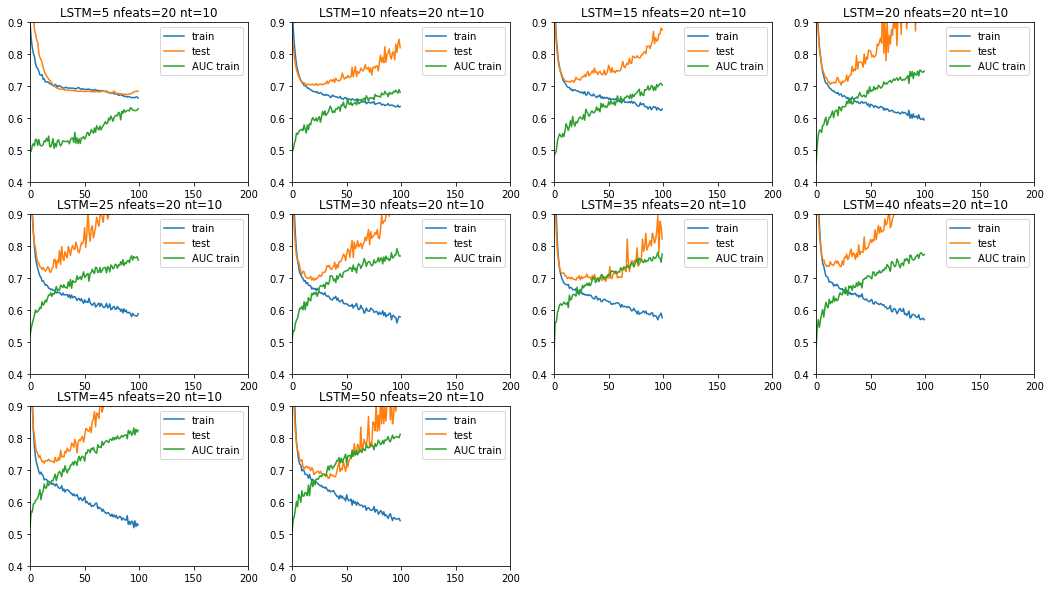

In [113]:
from matplotlib import pyplot
%matplotlib inline
# fig=pyplot.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
pyplot.rcParams['figure.figsize'] = [18, 10]

model_stats = run.data.model_stats
bkeys = list(model_stats)
for ik, branch_keys in enumerate(bkeys):
    branch = model_stats[branch_keys]
    # print("branch keys:", list(branch))

    h1 = branch['history_loss']
    h2 = branch['history_val_loss']
    h3 = branch['history_auc']
    
    if len(bkeys) < 5:
        pyplot.subplot(1, len(bkeys), ik+1)
    else:
        pyplot.subplot(3, 1+int(len(bkeys)/3), ik+1)
        
    pyplot.title("LSTM=" + str(branch_keys) + " nfeats=" + str(run.data.nfeatures) + " nt="+ str(run.data.nbackward))
    pyplot.plot(h1, label="train")
    pyplot.plot(h2, label="test")
    pyplot.plot(h3, label="AUC train")
    pyplot.legend()
    axes = pyplot.gca()
    axes.set_xlim([0,200])
    axes.set_ylim([0.4, 0.9])

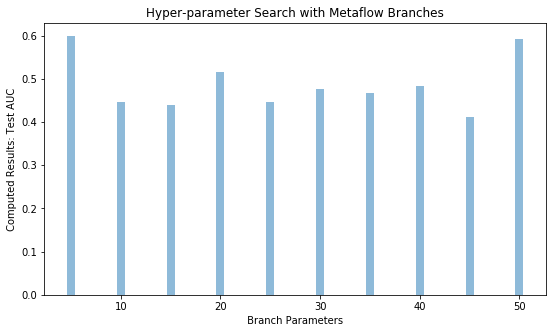

In [114]:
pyplot.rcParams['figure.figsize'] = [9, 5]

d = run.data.model_stats # dic
branch, train_auc = zip(*[(k, d[k]['train_auc']) for k in sorted(list(d)) ])
branch2, test_auc = zip(*[(k, d[k]['test_auc']) for k in sorted(list(d)) ])

# Create the bar plot
plt.bar(branch[:], test_auc[:], align='center', alpha=0.5)
#pyplot.plot(branch, train_auc)
#pyplot.plot(branch2, test_auc)
plt.title("Hyper-parameter Search with Metaflow Branches")
plt.ylabel(" Computed Results: Test AUC ")
plt.xlabel(" Branch Parameters ")
plt.show()